# Analysis of user collection

In this notebook, the retrieved results of the user collection is analyzed.

In [1]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

Folders and constants

In [3]:
fp_figs = Path("figs")

## User collection files

In [4]:
data_files = glob.glob("methods/*/results/*.csv")

data_files

['methods/papers_with_code/results/paperswithcode.csv',
 'methods/github_search/results/github_search_topic.csv',
 'methods/github_search/results/github_search_users.csv',
 'methods/github_search/results/github_search_repos.csv',
 'methods/profile_pages/results/profile_page_uu.csv',
 'methods/pure/results/pure.csv']

## Dataset
The data contains the source where the GitHub user id is found, the GitHub user id and university id if it is available.

In [5]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long["source"] = df_github_names_long["source"].apply(lambda x: Path(x).stem)
df_github_names_long

,source,service,user_id
0,paperswithcode,github.com,MarcelRobeer
1,paperswithcode,github.com,YevgenyW
2,paperswithcode,github.com,puregome
3,paperswithcode,github.com,AI4Finance-LLC
4,paperswithcode,github.com,AI4Finance-Foundation
...,...,...,...
645,pure,github.com,keesmulder
646,pure,github.com,RianneSchouten
647,pure,github.com,ydluo
648,pure,github.com,marnixnaber


### Retrieval count

The following results shows how many times user indentifiers are found with each retrieval method. This can be an indicator the findability of users. 

In [6]:
df_name_method_crosstab = pd.crosstab(
    df_github_names_long["user_id"],
    df_github_names_long["source"]
)
df_name_method_crosstab

source,github_search_repos,github_search_topic,github_search_users,paperswithcode,profile_page_uu,pure
user_id,,,,,,
19giorgosts,0,0,1,0,0,0
4009509,0,0,1,0,0,0
73616e646572,0,0,0,0,1,0
AI4Finance-Foundation,0,0,0,1,0,0
AI4Finance-LLC,0,0,0,2,0,0
...,...,...,...,...,...,...
yoepvanloenen,1,0,0,0,0,0
ystouthart,1,1,0,0,0,0
yuntaoj,0,0,1,0,0,0


The following example shows the findability of the ASReview project (project at Utrecht University).

In [7]:
df_name_method_crosstab.loc['asreview']

source
github_search_repos    0
github_search_topic    7
github_search_users    0
paperswithcode         0
profile_page_uu        4
pure                   0
Name: asreview, dtype: int64

In [8]:
df_name_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=1).sort_values(ascending=False).to_frame(name="count")
df_name_findability["relative"] = df_name_findability["count"] / len(data_files)
df_name_findability


,count,relative
user_id,,
UtrechtUniversity,3,0.500000
J535D165,3,0.500000
ekatrukha,3,0.500000
UU-Hydro,3,0.500000
kevin4998,3,0.500000
...,...,...
SolennWalstra,1,0.166667
SiefBlok,1,0.166667
Shellydun,1,0.166667


In [9]:
df_method_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=0).sort_values(ascending=False)
df_method_findability

source
github_search_users    263
github_search_repos    179
profile_page_uu         64
github_search_topic     17
pure                    11
paperswithcode          10
dtype: int64

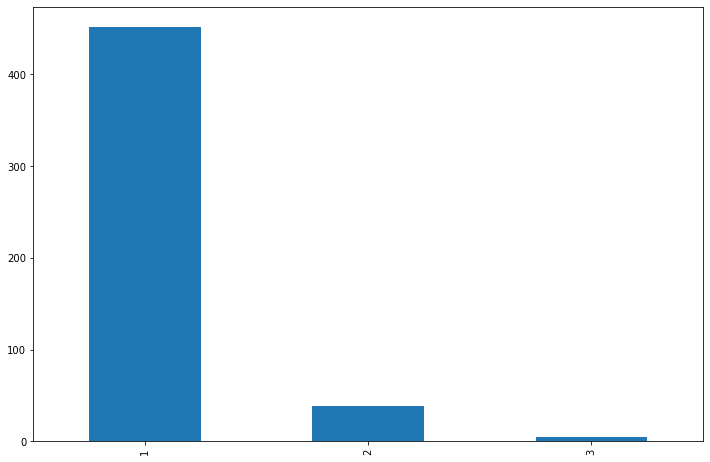

In [10]:
df_name_findability["count"].value_counts().plot.bar()
plt.savefig(Path(fp_figs, 'user_collection_user_findability.png'))

# sns.histplot(data=df_name_findability, x="count", discrete=True, shrink=.8)

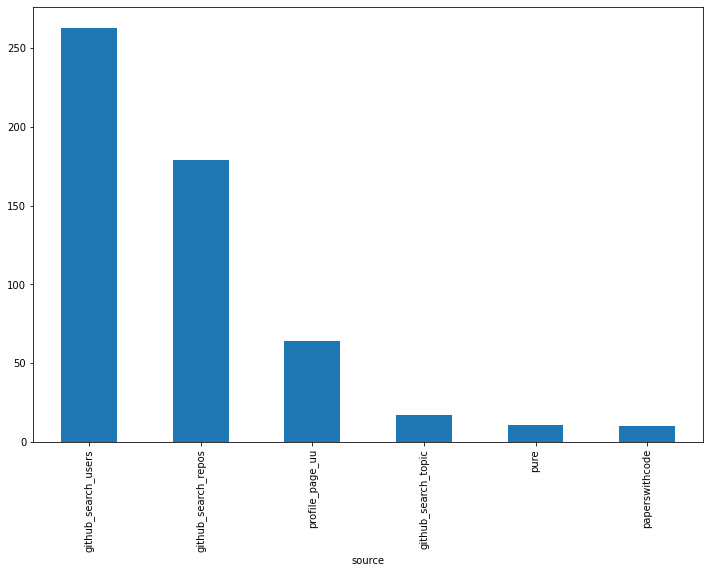

In [11]:
df_method_findability.plot.bar()
plt.savefig(Path(fp_figs, 'user_collection_method_findability.png'))

In [12]:
df_annotated_users = pd.read_excel(Path("results", "users_enriched_updated_2021-11-20.xlsx"))
df_annotated_users[["user_id", "is_student", "is_employee", "is_currently_employed", "is_research_group", "final_decision"]]

,user_id,is_student,is_employee,is_currently_employed,is_research_group,final_decision
0,19910101bacon,False,NaN,NaN,NaN,0
1,19giorgosts,False,1.0,1.0,0.0,1
2,4009509,True,0.0,0.0,0.0,0
3,73616e646572,False,1.0,1.0,0.0,1
4,a-quei,False,0.0,0.0,0.0,1
...,...,...,...,...,...,...
485,ystouthart,False,0.0,0.0,0.0,0
486,yuntaoj,False,0.0,0.0,0.0,1
487,zievathustra,False,1.0,1.0,0.0,1
488,zupami,False,0.0,0.0,0.0,0


In [13]:
df_annotated_users_included = df_annotated_users[df_annotated_users["final_decision"] == 1]

,user_id,public_repos
68,brentp,195.0
449,uil-ots-labs,117.0
89,clariah,113.0
453,utrechtuniversity,90.0
87,cjvanlissa,83.0
457,uudigitalhumanitieslab,67.0
462,vankesteren,56.0
319,mycrofd,47.0
204,j535d165,47.0
421,stan-dev,45.0


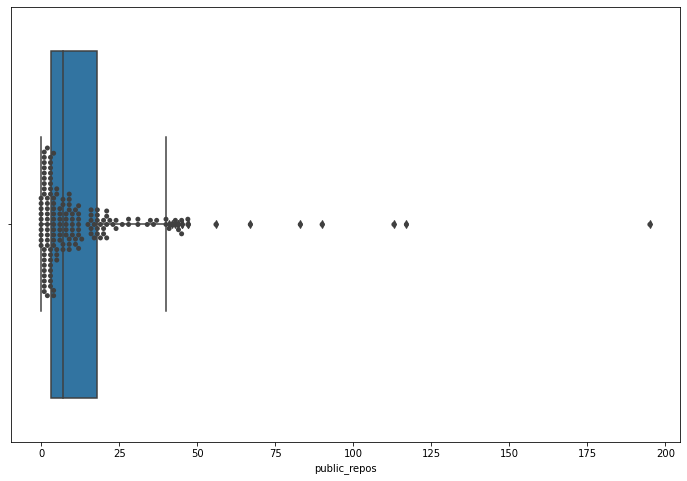

In [14]:
ax = sns.boxplot(x='public_repos', data=df_annotated_users_included)
ax = sns.swarmplot(x='public_repos', data=df_annotated_users_included, color=".25")
df_annotated_users_included[['user_id', 'public_repos']].sort_values('public_repos', ascending=False).head(10)

,user_id,public_gists
68,brentp,184.0
462,vankesteren,50.0
129,ekatrukha,8.0
105,daob,8.0
204,j535d165,7.0
336,norm2782,6.0
378,richardbartels,6.0
209,japhir,5.0
476,wouter-swierstra,5.0
271,leonardovida,4.0


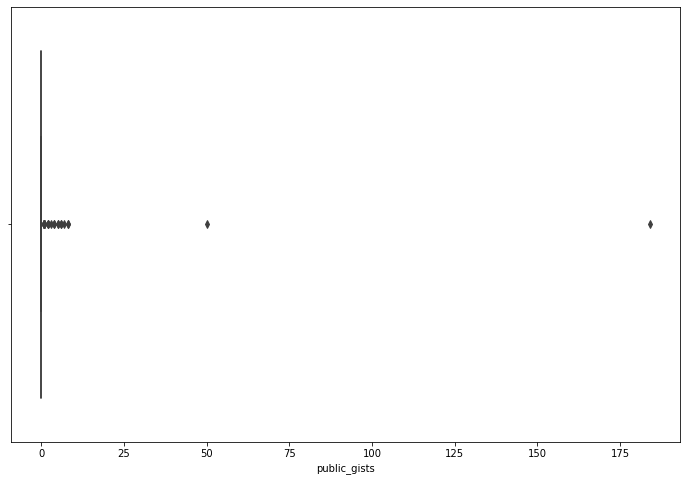

In [15]:
sns.boxplot(x='public_gists', data=df_annotated_users_included)
df_annotated_users_included[['user_id', 'public_gists']].sort_values('public_gists', ascending=False).head(10)

,user_id,followers
68,brentp,982.0
204,j535d165,149.0
424,stefvanbuuren,135.0
213,jbikker,128.0
476,wouter-swierstra,106.0
462,vankesteren,60.0
336,norm2782,58.0
87,cjvanlissa,48.0
14,alexandrosstergiou,43.0
161,gerkovink,38.0


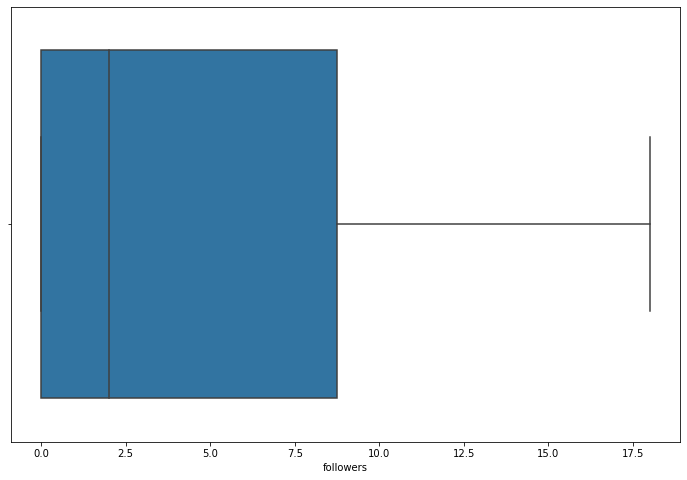

In [16]:
ax = sns.boxplot(x='followers', data=df_annotated_users_included, showfliers=False)

df_annotated_users_included[['user_id', 'followers']].sort_values('followers', ascending=False).head(10)

,user_id,following
66,bozso,318.0
68,brentp,193.0
204,j535d165,91.0
69,bricker0,75.0
462,vankesteren,46.0
177,hanneoberman,46.0
271,leonardovida,39.0
63,bmatern,37.0
209,japhir,34.0
231,joaomcteixeira,30.0


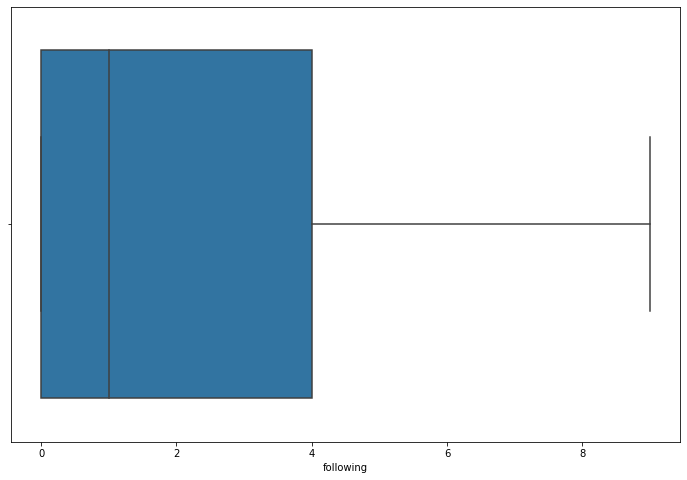

In [17]:
sns.boxplot(x=df_annotated_users_included['following'], showfliers = False)
df_annotated_users_included[['user_id', 'following']].sort_values('following', ascending=False).head(10)
